In [1]:
import OMPython

from OMPython import OMCSessionZMQ
from OMPython import ModelicaSystem

omc = OMCSessionZMQ()


In [16]:
omc.sendExpression('getVersion()')


'OpenModelica v1.24.3 (64-bit)'

In [19]:
omc.sendExpression("loadFile(\"c:/Users/thogan1/Documents/GitHub/OceanEngineeringToolbox/OET.mo\")")


True

In [20]:
omc.sendExpression("instantiateModel(OET.Example.multibodyWECSingleDoF)")

'function Modelica.Math.Vectors.interpolate "Interpolate linearly in a vector"\n  input Real[:] x "Abscissa table vector (strict monotonically increasing values required)";\n  input Real[size(x, 1)] y "Ordinate table vector";\n  input Real xi "Desired abscissa value";\n  input Integer iLast = 1 "Index used in last search";\n  output Real yi "Ordinate value corresponding to xi";\n  output Integer iNew = 1 "xi is in the interval x[iNew] <= xi < x[iNew+1]";\n  protected Integer i;\n  protected Integer nx = size(x, 1);\n  protected Real x1;\n  protected Real x2;\n  protected Real y1;\n  protected Real y2;\nalgorithm\n  assert(nx > 0, "The table vectors must have at least 1 entry.");\n  if nx == 1 then\n    yi := y[1];\n  else\n    i := min(max(iLast, 1), nx - 1);\n    if xi >= x[i] then\n      while i < nx and xi >= x[i] loop\n        i := i + 1;\n      end while;\n      i := i - 1;\n    else\n      while i > 1 and xi < x[i] loop\n        i := i - 1;\n      end while;\n    end if;\n    x1 

In [21]:
omc.sendExpression("simulate(OET.Example.multibodyWECSingleDoF, stopTime=10.0)")

{'resultFile': 'c:/Users/thogan1/Documents/GitHub/OceanEngineeringToolbox/OET.Example.multibodyWECSingleDoF_res.mat',
 'simulationOptions': "startTime = 0.0, stopTime = 10.0, numberOfIntervals = 10000, tolerance = 1e-8, method = 'dassl', fileNamePrefix = 'OET.Example.multibodyWECSingleDoF', options = '', outputFormat = 'mat', variableFilter = '.*', cflags = '', simflags = ''",
 'messages': 'LOG_STDOUT        | info    | ... loading "hydro.parameters.rho" from "C:/Users/thogan1/Documents/GitHub/OceanEngineeringToolbox/RM3HydroCoeff.mat"\nLOG_STDOUT        | info    | ... loading "hydro.coefficients.excitation.spectralDecomp.im1" from "C:/Users/thogan1/Documents/GitHub/OceanEngineeringToolbox/RM3HydroCoeff.mat"\nLOG_STDOUT        | info    | ... loading "hydro.coefficients.excitation.spectralDecomp.re1" from "C:/Users/thogan1/Documents/GitHub/OceanEngineeringToolbox/RM3HydroCoeff.mat"\nLOG_STDOUT        | info    | ... loading "hydro.parameters.w" from "C:/Users/thogan1/Documents/GitHub/

In [3]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
model_path = 'c:/Users/thogan1/Documents/GitHub/OceanEngineeringToolbox/OET.mo'
from OMPython import ModelicaSystem


In [5]:
mod = ModelicaSystem(model_path, 'OET.Example.multibodyWECSingleDoF')
#mod = ModelicaSystem(model_path, 'OET.Experimental.pooker')

Notification: Automatically loaded package Modelica 4.0.0 due to uses annotation from OET.
Notification: Automatically loaded package Complex 4.0.0 due to uses annotation from Modelica.
Notification: Automatically loaded package ModelicaServices 4.0.0 due to uses annotation from Modelica.

[c:/Users/thogan1/Documents/GitHub/OceanEngineeringToolbox/OET.mo:1023:82-1023:127:writable] Warning: Conditional component 'regularWave' is used in a non-connect context.
[c:/Users/thogan1/Documents/GitHub/OceanEngineeringToolbox/OET.mo:1023:51-1023:80:writable] Warning: Conditional component 'regularWave' is used in a non-connect context.
[c:/Users/thogan1/Documents/GitHub/OceanEngineeringToolbox/OET.mo:1023:154-1023:189:writable] Warning: Conditional component 'regularWave' is used in a non-connect context.
[c:/Users/thogan1/Documents/GitHub/OceanEngineeringToolbox/OET.mo:2941:9-2941:33:writable] Warning: Conditional component 'spectrumImport' is used in a non-connect context.
[c:/Users/thogan1/Do

In [6]:
mod.simulate()


In [7]:
mod.getSolutions("time")

array([[0.0000e+00, 5.0000e-02, 1.0000e-01, ..., 4.9995e+02, 5.0000e+02,
        5.0000e+02]])

In [44]:
help(mod.convertMo2Fmu)

Help on method convertMo2Fmu in module OMPython:

convertMo2Fmu(
    version='2.0',
    fmuType='me_cs',
    fileNamePrefix='<default>',
    includeResources=True
) method of OMPython.ModelicaSystem instance
    This method is used to generate FMU from the given Modelica model. It creates "modelName.fmu" in the current working directory. It can be called:
    with no arguments
    with arguments of https://build.openmodelica.org/Documentation/OpenModelica.Scripting.translateModelFMU.html
    usage
    >>> convertMo2Fmu()
    >>> convertMo2Fmu(version="2.0", fmuType="me|cs|me_cs", fileNamePrefix="<default>", includeResources=true)



In [45]:
mod.convertMo2Fmu(fmuType='me')

'C:/Users/thogan1/AppData/Local/Temp/tmp1vmghsjl/OET.Experimental.multibodyWEC_er.fmu'

In [11]:
sol = mod.getQuantities()
pd.DataFrame(sol)

name changeable  \
0       hydrodynamicBody.bodyShape.body.phi[1]      false   
1       hydrodynamicBody.bodyShape.body.phi[2]      false   
2       hydrodynamicBody.bodyShape.body.phi[3]      false   
3     hydrodynamicBody.bodyShape.body.phi_d[1]      false   
4     hydrodynamicBody.bodyShape.body.phi_d[2]      false   
...                                        ...        ...   
8242               world.z_arrowHead.shapeType      false   
8243               world.z_arrowLine.shapeType      false   
8244      world.z_label.cylinders[1].shapeType      false   
8245      world.z_label.cylinders[2].shapeType      false   
8246      world.z_label.cylinders[3].shapeType      false   

                                            description variability  \
0     Dummy or 3 angles to rotate world frame into f...  continuous   
1     Dummy or 3 angles to rotate world frame into f...  continuous   
2     Dummy or 3 angles to rotate world frame into f...  continuous   
3                                            = der(phi)  continuous   
4                                            = der(phi)  continuous   
...                                                 ...         ...   
8242  Type of shape (box, sphere, cylinder, pipecyli...   parameter   
8243  Type of shape (box, sphere, cylinder, pipecyli...   parameter   
8244  Type of shape (box, sphere, cylinder, pipecyli...   parameter   
8245  Type of shape (box, sphere, cylinder, pipecyli...   parameter   
8246  Type of shape (box, sphere, cylinder, pipecyli...   parameter   

                causality    alias aliasvariable     start   min   max   unit  
0                   local  noAlias          None      None  None  None    rad  
1                   local  noAlias          None      None  None  None    rad  
2                   local  noAlias          None      None  None  None    rad  
3                   local  noAlias          None      None  None  None  rad/s  
4                   local  noAlias          None      None  None  None  rad/s  
...                   ...      ...           ...       ...   ...   ...    ...  
8242  calculatedParameter  noAlias          None      cone  None  None   None  
8243  calculatedParameter  noAlias          None  cylinder  None  None   None  
8244  calculatedParameter  noAlias          None  cylinder  None  None   None  
8245  calculatedParameter  noAlias          None  cylinder  None  None   None  
8246  calculatedParameter  noAlias          None  cylinder  None  None   None  

[8247 rows x 11 columns]

In [36]:
xPos, time = mod.getSolutions(['hydrodynamicBody.bodyShape.body.r_0[1]','time'])


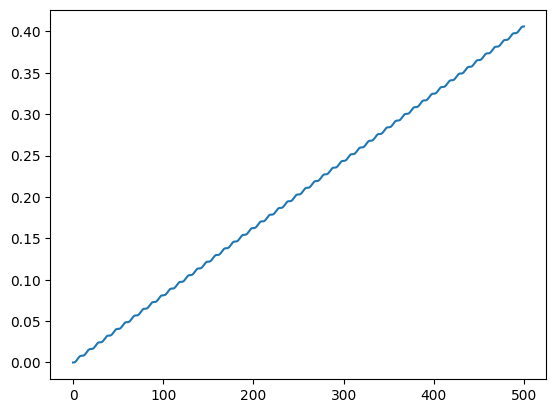

In [39]:
plt.plot(time, xPos)
plt.show()

In [38]:
print(time)

[0.0000e+00 5.0000e-02 1.0000e-01 ... 4.9995e+02 5.0000e+02 5.0000e+02]


In [66]:
from fmpy import *
fmu = 'OET.Experimental.multibodyWEC_er.fmu'
dump(fmu)

FileNotFoundError: [Errno 2] No such file or directory: 'OET.Experimental.multibodyWEC_er.fmu'

In [69]:
import fmpy
fmu = 'multibodyWEC_er.fmu'
dump(fmu)

FileNotFoundError: [Errno 2] No such file or directory: 'multibodyWEC_er.fmu'

In [67]:
fmpy.simulate_fmu(fmu)

FileNotFoundError: [Errno 2] No such file or directory: 'OET.Experimental.multibodyWEC_er.fmu'

In [10]:
import tempfile
import os

f = tempfile.gettempdir()
folderName = 'MassSpringDamper03c5'
fileName = 'MassSpringDamper.fmu'
fmu_filename = os.path.join(f, 'OpenModelica','OMEdit', folderName, fileName)
print(fmu_filename)

C:\Users\thogan1\AppData\Local\Temp\OpenModelica\OMEdit\MassSpringDamper03c5\MassSpringDamper.fmu


In [11]:
fmpy.dump(fmu_filename)


Model Info

  FMI Version        2.0
  FMI Type           Model Exchange, Co-Simulation
  Model Name         MassSpringDamper
  Description        
  Platforms          c-code, win64
  Continuous States  2
  Event Indicators   0
  Variables          8
  Generation Tool    OpenModelica Compiler OpenModelica v1.24.3 (64-bit)
  Generation Date    2024-12-31T12:11:33Z

Default Experiment

  Stop Time          1.0
  Tolerance          1e-06
  Step Size          0.002

Variables (input, output)

  Name               Causality              Start Value  Unit     Description
  F                  input                          0.0           External force (N)


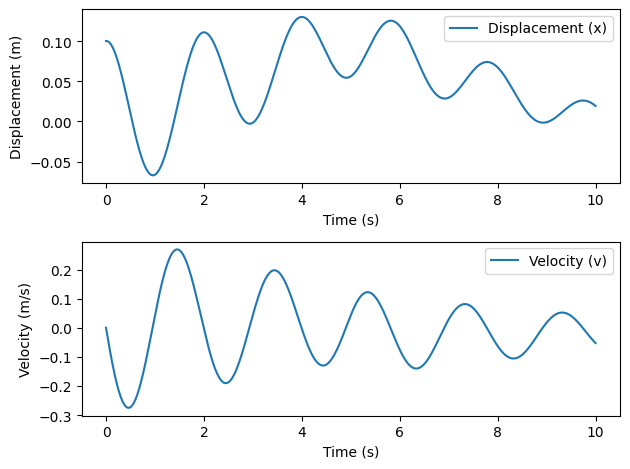

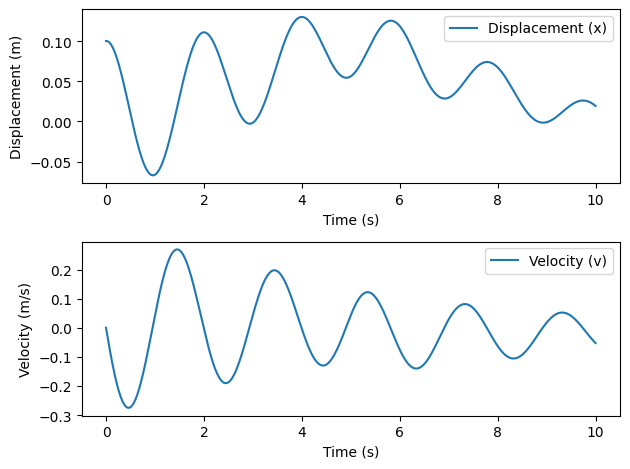

In [5]:
import fmpy
import numpy as np
import matplotlib.pyplot as plt

# Define the path to your FMU
fmu_filename = r"C:\Users\thogan1\AppData\Local\Temp\OpenModelica\OMEdit\MassSpringDamper03c5\MassSpringDamper.fmu"

# Extract and load the FMU
model_description = fmpy.read_model_description(fmu_filename)
unzipdir = fmpy.extract(fmu_filename)

# Set up the simulation parameters
start_time = 0.0
stop_time = 10.0
step_size = 0.01

# Prepare the input data as a structured NumPy array
# The input variable name ('F') must match the FMU model's input variable
time_points = np.array([0.0, 5.0, 10.0])  # Time values
force_values = np.array([0.0, 1.0, 0.0])  # Corresponding force values

# Create a structured array with fields: 'time' and the variable name 'F'
input_data = np.zeros(len(time_points), dtype=[('time', np.float64), ('F', np.float64)])
input_data['time'] = time_points
input_data['F'] = force_values

# Simulate the FMU
result = fmpy.simulate_fmu(
    filename=fmu_filename,
    start_time=start_time,
    stop_time=stop_time,
    step_size=step_size,
    input=input_data,  # Structured array as input
    output=['x', 'v']  # Specify the variables to output
)

# Plot the results
time = result['time']
displacement = result['x']  # Displacement variable from FMU
velocity = result['v']      # Velocity variable from FMU

plt.figure()
plt.subplot(2, 1, 1)
plt.plot(time, displacement, label="Displacement (x)")
plt.xlabel('Time (s)')
plt.ylabel('Displacement (m)')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(time, velocity, label="Velocity (v)")
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.legend()

plt.tight_layout()
plt.show()

# Extract and load the FMU
model_description = fmpy.read_model_description(fmu_filename)
unzipdir = fmpy.extract(fmu_filename)

# Set up the simulation parameters
start_time = 0.0
stop_time = 10.0
step_size = 0.01

# Prepare the input data as a structured NumPy array
# The input variable name ('F') must match the FMU model's input variable
time_points = np.array([0.0, 5.0, 10.0])  # Time values
force_values = np.array([0.0, 1.0, 0.0])  # Corresponding force values

# Create a structured array with fields: 'time' and the variable name 'F'
input_data = np.zeros(len(time_points), dtype=[('time', np.float64), ('F', np.float64)])
input_data['time'] = time_points
input_data['F'] = force_values

# Simulate the FMU
result = fmpy.simulate_fmu(
    filename=fmu_filename,
    start_time=start_time,
    stop_time=stop_time,
    step_size=step_size,
    input=input_data,  # Structured array as input
    output=['x', 'v']  # Specify the variables to output
)

# Plot the results
time = result['time']
displacement = result['x']  # Displacement variable from FMU
velocity = result['v']      # Velocity variable from FMU

plt.figure()
plt.subplot(2, 1, 1)
plt.plot(time, displacement, label="Displacement (x)")
plt.xlabel('Time (s)')
plt.ylabel('Displacement (m)')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(time, velocity, label="Velocity (v)")
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.legend()

plt.tight_layout()
plt.show()

In [9]:
fmpy.dump(fmu_filename)


Model Info

  FMI Version        2.0
  FMI Type           Model Exchange, Co-Simulation
  Model Name         OET.Example.multibodyWECSingleDoF
  Description        
  Platforms          c-code, win64
  Continuous States  206
  Event Indicators   1
  Variables          1980
  Generation Tool    OpenModelica Compiler OpenModelica v1.24.3 (64-bit)
  Generation Date    2024-12-31T13:43:24Z

Default Experiment

  Stop Time          20.0
  Tolerance          1e-08
  Step Size          0.002

Variables (input, output)

  Name               Causality              Start Value  Unit     Description


In [12]:


# Define the path to your FMU
fmu_filename = r"C:\Users\thogan1\AppData\Local\Temp\OpenModelica\OMEdit\multibodyWECSingleDoFc2d0\multibodyWECSingleDoF.fmu"

# Extract and load the FMU
model_description = fmpy.read_model_description(fmu_filename)
unzipdir = fmpy.extract(fmu_filename)


# Simulate the FMU
result = fmpy.simulate_fmu(
    filename=fmu_filename
)




FMICallException: fmi2ExitInitializationMode failed with status 3 (error).